In [1]:
## Parameter values MoS2
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

MoS2 = SC.TMDmonolayerSC(material="MoS2");
print(MoS2.a); print(MoS2.b); print(MoS2.c); print(MoS2.d);

8.1063
-0.0015
0.3645
-0.157


In [ ]:
## Parameter values MoSe2
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

MoSe2 = SC.TMDmonolayerSC(material="MoSe2");
print(MoSe2.a); print(MoSe2.b); print(MoSe2.c); print(MoSe2.d);

In [ ]:
## Parameter values MoTe2
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

MoTe2 = SC.TMDmonolayerSC(material="MoTe2");
print(MoTe2.a); print(MoTe2.b); print(MoTe2.c); print(MoTe2.d);

In [ ]:
## Band of MoSe2 and grid of k-points:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib notebook
MoS2 = SC.TMDmonolayerSC(material="MoSe2");
mu = 0.15;
hwc = 0.05;
kxs = np.linspace(-0.25, 0.25, 100);
EsUp = MoS2.Hnormal(kxs, 0.0, 1, 1);
EsDown = MoS2.Hnormal(kxs, 0.0, 1, -1);
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(kxs, EsUp, 'r-', kxs, EsDown, 'b-');
ax.axhline(mu, linestyle='dotted', color='k');
ax.fill_between(kxs, mu+hwc, mu-hwc, alpha=0.5);
ax.set_xlim(-0.25, 0.25);
ax.set_xlabel(r"$k_x$ [Å$^{-1}$]", size=17);
ax.set_ylabel(r"$E$ [eV]", size=17);
ax.tick_params(labelsize=17);
fig.tight_layout();
#fig.savefig("data/TMDlayer/k.p_bandMoTe2.pdf");

In [ ]:
MoS2 = SC.TMDmonolayerSC(material="MoTe2");
mu = 0.25;
hwc = 0.05;

%matplotlib notebook
fig = MoS2.displayFilteredGrid(mu, hwc, 500);
fig.gca().set_aspect("equal");
fig.set_size_inches(6,5);
fig.tight_layout();
fig.savefig("data/TMDlayer/filtered_kgrid.pdf");

In [ ]:
## Free energy minimization:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib notebook
MoX = SC.TMDmonolayerSC(material="MoSe2");
mu = 0.13;
res = 500;
hwc = 0.03;
Delta0 = 0.001;
Hext = 2.0 * Delta0;
T = 0.0 * Delta0;

MoX.plotFreeEnergy(mu, Delta0, hwc, res, Hext / np.sqrt(2), T, nDeltas=300, DeltaMax=1);
plt.xlabel(r"$\Delta / \Delta_0$", size=17);
plt.ylabel(r"Free energy", size=17);
plt.yticks([]);
plt.tight_layout();
plt.tick_params(labelsize=17);
#plt.savefig("data/TMDlayer/minFreeEn_T={}_Hext={}.pdf".format(T/Delta0, Hext/Delta0));

In [ ]:
## Delta diagram:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib notebook
MoSe2 = SC.TMDmonolayerSC(material="MoSe2");
mu = 0.139;
Delta0 = 0.001;
hwc = 0.03;
res = 250;

MoSe2.DeltaDiagram(mu, Delta0, hwc, res, 50, 50);

In [ ]:
## Quick diagram of critical field diagram:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib notebook
MoSe2 = SC.TMDmonolayerSC(material="MoSe2");
fig = MoSe2.HcDiagramApprox(0.0, 0.3, 1e-4, 1e-3, 800, 30.0, 50, 50);
fig.tight_layout(); fig.savefig("data/TMDlayer/approxHcDiagram.pdf");

In [ ]:
## Quick plot-diagram:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib notebook
MoS2 = SC.TMDmonolayerSC(material="MoS2");
mu = 0.04;
Delta0 = 0.001;
hwc = 0.03;
res = 500;
Hexts = np.linspace(0.0*Delta0, 3.0*Delta0, 128);

ksplus, ksmin = MoS2.generate_ks(mu, hwc, res);
V = MoS2.Vint(mu, ksplus, ksmin, Delta0);
results = [];

for Hext in Hexts:
    results.append( MoS2.findDelta(mu, ksplus, ksmin, Delta0, Hext, 0.0, V) );

plt.plot(np.sqrt(2)*Hexts/Delta0, np.array(results)/Delta0);
plt.axvline(np.sqrt(2)*MoS2.findHc(mu, Delta0, ksplus, ksmin, V, maxfactor=3.0)/Delta0, color='k', linestyle='dotted');
plt.xlabel(r"$H_{ext} / H_p$", size=17);
plt.ylabel(r"$\Delta / \Delta_0$", size=17);
plt.tight_layout();
plt.tick_params(labelsize=17);
plt.savefig("data/TMDlayer/findHc_mu={}.pdf".format(mu));

In [ ]:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib notebook
MoX = SC.TMDmonolayerSC(material="MoSe2");
mu = 0.15;
Delta0 = 0.001;
#hwc0 = 0.015;
hwcs = np.linspace(0.01*Delta0, 30*Delta0, 100);
res = [100,250,500];
T = 0.3*Delta0;
Hext = 1.0*Delta0;
Delta = [[],[],[]];
for hwc in hwcs:
    for i in [0,1,2]:
        ksplus, ksmin = MoX.generate_ks(mu, hwc, res[i]);
        V = MoX.Vint(mu, ksplus, ksmin, Delta0);
        Delta[i].append(MoX.findDelta(mu, ksplus, ksmin, Delta0, Hext / np.sqrt(2), T, V));

plt.plot(np.array(hwcs)/Delta0, np.transpose(np.array(Delta)/Delta0));
plt.xlabel(r'Cutoff energy [× $\Delta_0$]', size=17);
plt.ylabel(r'$\Delta / \Delta_0$', size=17);
plt.tick_params(labelsize=17);
plt.tight_layout();
plt.savefig("data/TMDlayer/convergence_mu={}_T={}_Hext={}.pdf".format(mu, T/Delta0, Hext/Delta0));

In [ ]:
# Uncertainty:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib notebook
MoX = SC.TMDmonolayerSC(material="MoTe2");
mu = 0.159;
Delta0 = 0.0001;
hwcmin = 15*Delta0;
hwcmax = 20*Delta0;
#hwcs = (hwcmax - hwcmin)*np.random.rand(10) + hwcmin;
resolutions = np.arange(700,1300,100);
rel_err = [];

for res in resolutions:
    Hcs = [];
    hwcs = (hwcmax - hwcmin)*np.random.rand(12) + hwcmin;
    for hwc in hwcs:
        ksplus, ksmin = MoX.generate_ks(mu, hwc, res);
        print("Processing hwc/Delta0 = {}, for res = {}...".format(hwc/Delta0, res), end='\r');
        V = MoX.Vint(mu, ksplus, ksmin, Delta0);
        Hcs.append(MoX.findHc(mu, Delta0, ksplus, ksmin, V));
    mean = np.mean(Hcs);
    std = np.std(Hcs);
    rel_err.append(std/mean);

plt.plot(resolutions, rel_err, '.', markersize=10);
plt.xlabel(r'Resolution', size=17);
plt.ylabel(r'Relative uncertainty', size=17);
plt.tick_params(labelsize=17);
plt.tight_layout();
plt.savefig("data/TMDlayer/rel_err_MoTe2_mu={}_Delta0={}.pdf".format(mu, Delta0));

In [7]:
# Free electron case:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib inline
FreeElectrons = SC.TMDmonolayerSC(material="Free");
mu = 0.1;
Delta0Max = 0.001
Delta0s = np.linspace(Delta0Max/100, Delta0Max, 50);
res = 500;
Hcs = [];
Tcs = [];
kxgrid, kygrid, etagrid = FreeElectrons.create_kgrid(mu, Delta0Max*15.0, res);

for Delta0 in Delta0s:
    hwc = 15.0*Delta0;
    ksplus, ksmin = FreeElectrons.choose_ks(kxgrid, kygrid, etagrid, mu, hwc);
    V = FreeElectrons.Vint(mu, ksplus, ksmin, Delta0);
    print("\rProcessing Delta0 = {} meV...".format(Delta0*1000), end='');
    Hcs.append(FreeElectrons.findHc(mu, Delta0, ksplus, ksmin, V, maxfactor=1.0));
    Tcs.append(FreeElectrons.findTc(mu, Delta0, ksplus, ksmin, V));
    
pauliHcs = 1000 * Delta0s / np.sqrt(2);

plt.plot(Delta0s*1000, np.array(Hcs)*1000, 'r-', Delta0s*1000, pauliHcs, 'k+');
plt.xlabel(r'$\Delta_0$ [meV]', size=17);
plt.ylabel(r'$\mu_B H_c$ [meV]', size=17);
plt.tick_params(labelsize=17);
plt.tight_layout();
plt.savefig("data/TMDlayer/freeElectronsHc.pdf");

Processing Delta0 = 1.0 meV...

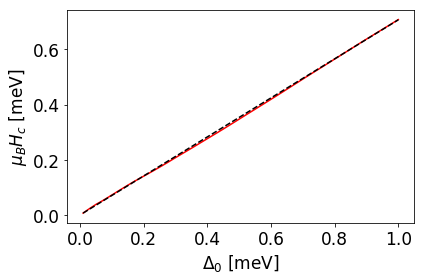

In [13]:
plt.close();
plt.plot(Delta0s*1000, np.array(Hcs)*1000, 'r-', Delta0s*1000, pauliHcs, 'k--');
plt.xlabel(r'$\Delta_0$ [meV]', size=17);
plt.ylabel(r'$\mu_B H_c$ [meV]', size=17);
plt.tick_params(labelsize=17);
plt.tight_layout();
plt.savefig("data/TMDlayer/freeElectronsHc.pdf");

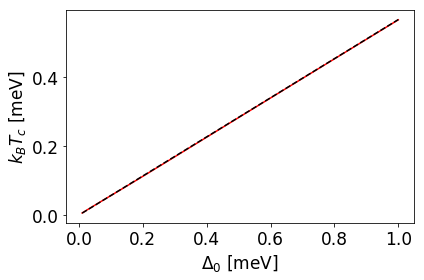

In [14]:
expectedTcs = 1000 * Delta0s * np.exp(0.5772156649) / np.pi;
plt.close();
plt.plot(Delta0s*1000, np.array(Tcs)*1000, 'r-', Delta0s*1000, expectedTcs, 'k--');
plt.xlabel(r'$\Delta_0$ [meV]', size=17);
plt.ylabel(r'$k_B T_c$ [meV]', size=17);
plt.tick_params(labelsize=17);
plt.tight_layout();
plt.savefig("data/TMDlayer/freeElectronsTc.pdf");

In [ ]:
## Phase diagram for MoSe2:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib widget
material = "MoSe2";
MoSe2 = SC.TMDmonolayerSC(material=material);
mu = 0.134;
Delta0 = 0.001;
hwc = 0.015;
res = 500;

fig = MoSe2.phaseDiagram(mu, Delta0, hwc, res, 128, 128);
fig.tight_layout();
fig.savefig("data/TMDlayer/phaseDiagram{}_mu={}.pdf".format(material, mu));

In [ ]:
## Phase diagram for MoS2:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib widget
material = "MoS2";
MoS2 = SC.TMDmonolayerSC(material=material);
mu = 0.033;
Delta0 = 0.001;
hwc = 0.015;
res = 500;

fig = MoS2.phaseDiagram(mu, Delta0, hwc, res, 128, 128);
fig.tight_layout();
fig.savefig("data/TMDlayer/phaseDiagram{}_mu={}.pdf".format(material, mu));

In [ ]:
## Phase diagram for MoTe2:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib widget
material = "MoTe2";
MoTe2 = SC.TMDmonolayerSC(material=material);
mu = 0.135;
Delta0 = 0.001;
hwc = 0.015;
res = 500;

fig = MoTe2.phaseDiagram(mu, Delta0, hwc, res, 128, 128);
fig.tight_layout();
fig.savefig("data/TMDlayer/phaseDiagram{}_mu={}.pdf".format(material, mu));

In [1]:
# Hc diagram MoS2
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

material = "MoS2";
MoX = SC.TMDmonolayerSC(material=material);
muMin = 0.0;
muMax = 0.066;
Delta0Min = 0.0001;
Delta0Max = 0.001;
res = 600;

muVanishMin = 0.0324;
muVanishMax = 0.0343;

fig = MoX.HcDiagram(muMin, muMax, Delta0Min, Delta0Max, res, nMu=50, nDelta0=50, nCores=150);
fig.tight_layout();
ax = fig.gca();
ax.axvline(1000*muVanishMin, color='w', linestyle='dotted');
ax.axvline(1000*muVanishMax, color='w', linestyle='dotted');
fig.savefig("data/TMDlayer/HcDiagram_{}.pdf".format(material));

2500/2500 tasks finished after 1196 s
done


2500/2500 tasks finished after  814 s
done


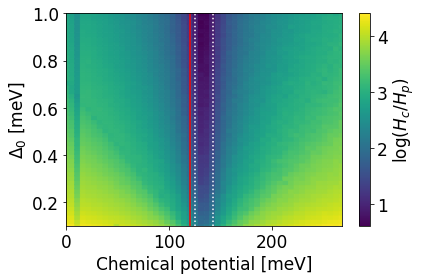

In [7]:
# Hc diagram MoSe2
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

material = "MoSe2";
MoX = SC.TMDmonolayerSC(material=material);
muMin = 0.00;
muMax = 0.268;
Delta0Min = 0.0001;
Delta0Max = 0.001;
res = 1000;

muVanishMin = 0.1253;
muVanishMax = 0.143;
muC = 0.12;

fig = MoX.HcDiagram(muMin, muMax, Delta0Min, Delta0Max, res, nMu=50, nDelta0=50, nCores=150, maxfactor=200.0);
fig.tight_layout();
ax = fig.gca();
ax.axvline(1000*muVanishMin, color='w', linestyle='dotted');
ax.axvline(1000*muVanishMax, color='w', linestyle='dotted');
ax.axvline(1000*muC, color='r');
fig.savefig("data/TMDlayer/HcDiagram_{}.pdf".format(material));

2500/2500 tasks finished after  884 s
done


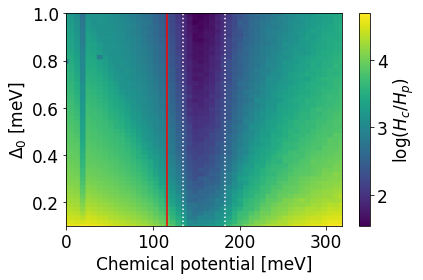

In [8]:
# Hc diagram MoTe2
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

material = "MoTe2";
MoX = SC.TMDmonolayerSC(material=material);
muMin = 0.0;
muMax = 0.318;
Delta0Min = 0.0001;
Delta0Max = 0.001;
res = 1200;

muVanishMin = 0.1347;
muVanishMax = 0.1829;
muC = 0.116;

fig = MoX.HcDiagram(muMin, muMax, Delta0Min, Delta0Max, res, nMu=50, nDelta0=50, nCores=150, maxfactor=200.0);
fig.tight_layout();
ax = fig.gca();
ax.axvline(1000*muVanishMin, color='w', linestyle='dotted');
ax.axvline(1000*muVanishMax, color='w', linestyle='dotted');
ax.axvline(1000*muC, color='r');
fig.savefig("data/TMDlayer/HcDiagram_{}.pdf".format(material));

2500/2500 tasks finished after  548 s
done


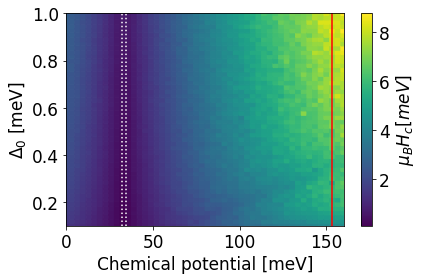

In [4]:
# Hc diagram MoS2
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

material = "MoS2";
MoX = SC.TMDmonolayerSC(material=material);
muMin = 0.0;
muMax = 0.16;
Delta0Min = 0.0001;
Delta0Max = 0.001;
res = 600;

muVanishMin = 0.0324;
muVanishMax = 0.0343;
muC = 0.153;

fig = MoX.HcDiagramAbsolute(muMin, muMax, Delta0Min, Delta0Max, res, nMu=50, nDelta0=50, nCores=150);
fig.tight_layout();
ax = fig.gca();
ax.axvline(1000*muVanishMin, color='w', linestyle='dotted');
ax.axvline(1000*muVanishMax, color='w', linestyle='dotted');
ax.axvline(1000*muC, color='r');
fig.savefig("data/TMDlayer/HcDiagram_{}_abs.pdf".format(material));

In [5]:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

material = "MoSe2";
np.seterr(all="raise");
MoX = SC.TMDmonolayerSC(material=material);
mu = 0.0
Delta0 = np.linspace(0.0001, 0.001, 50)[15];
res = 1000;
hwc = 15.0*Delta0;
ksplus, ksmin = MoX.generate_ks(mu, hwc, res);
V = MoX.Vint(mu, ksplus, ksmin, Delta0);
print(MoX.FreeEnergy(mu, ksplus, ksmin, 0.0, 0.0, 0.0, V));
print(MoX.FreeEnergy(mu, ksplus, ksmin, Delta0, 0.0, 0.0, V));
print(MoX.findDelta(mu, ksplus, ksmin, Delta0, 0.0, 0.0, V));

-1302.226722525131
-1305.1172613222975
0.0003755102040816327


In [2]:
# Hc diagram MoTe2
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

material = "MoTe2";
MoX = SC.TMDmonolayerSC(material=material);
muMin = 0.0;
muMax = 0.04;
Delta0Min = 0.0001;
Delta0Max = 0.0002;
res = 500;
ratio = 200.0;

fig = MoX.HcDiagram(muMin, muMax, Delta0Min, Delta0Max, res, hwcDeltaRatio=ratio, nMu=20, nDelta0=20, nCores=100, maxfactor=200.0);
fig.tight_layout();
fig.savefig("data/TMDlayer/HcDiagram_{}_ratio={}.pdf".format(material,ratio));

Killed old intances of ipcluster.
Launching 100 engines in a ipcluster.
Waiting for 0 seconds for the log-file.
2019-09-06 13:08:05.088 [IPClusterStart] Attempting to load config file: ipcluster_config.py
2019-09-06 13:08:05.088 [IPClusterStart] Looking for ipcluster_config in /etc/ipython
2019-09-06 13:08:05.088 [IPClusterStart] Looking for ipcluster_config in /usr/local/etc/ipython
2019-09-06 13:08:05.089 [IPClusterStart] Looking for ipcluster_config in /home/kevinchoi/miniconda3/etc/ipython
2019-09-06 13:08:05.089 [IPClusterStart] Looking for ipcluster_config in /home/kevinchoi/.ipython/profile_pbs
2019-09-06 13:08:05.089 [IPClusterStart] Loaded config file: /home/kevinchoi/.ipython/profile_pbs/ipcluster_config.py
2019-09-06 13:08:05.089 [IPClusterStart] Looking for ipcluster_config in /home/kevinchoi
Found the log-file (/home/kevinchoi/.ipython/profile_pbs/log/ipcluster-5343.log) in 0 seconds.
2019-09-06 13:08:05.094 [IPClusterStart] Starting ipcluster with [daemon=True]
2019-09-06

KeyboardInterrupt: 

In [2]:
## Phase diagram for MoSe2 at T=0:
import sys;
sys.path.append("code");
sys.path.append("data");
import numpy as np;
import TMDmonolayerSuperconductor as SC;
import matplotlib.pyplot as plt;
import numpy as np;

%matplotlib widget
material = "MoTe2";
MoSe2 = SC.TMDmonolayerSC(material=material);
muMin = 0.1347 - 0.01
muMax = 0.1829 + 0.01
Delta0 = 0.001;
hwc = 0.015;
res = 500;
Hext = 3.0*Delta0;

fig = MoSe2.phaseDiagramZeroT(muMin, muMax, Hext, Delta0, hwc, res, 128, 128);
ax = fig.gca();
ax.axvline(1000*0.1347, color='k', linestyle='dotted');
ax.axvline(1000*0.1829, color='k', linestyle='dotted');
fig.tight_layout();
fig.savefig("data/TMDlayer/phaseDiagramZeroT_{}.pdf".format(material));

16384/16384 tasks finished after    0 s
done


FigureCanvasNbAgg()